In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler


In [13]:
df=pd.read_csv('/Users/minalchandra/Downloads/WA_Fn-UseC_-Marketing-Customer-Value-Analysis 2.csv')

In [3]:
df.info()
for i in df.columns:
    print(df[i].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
ax = sns.countplot('Response',data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

ValueError: Could not interpret input 'Response'

In [7]:
categorical_df = df.select_dtypes(include='object')
cat_df = categorical_df.drop(['Customer','Effective To Date'], axis = 1)
cat_df.nunique()

KeyError: "['Customer' 'Effective To Date'] not found in axis"

In [8]:
cols = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size','Response']

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cols:
    cat_df[col] = lb.fit_transform(cat_df[col])

NameError: name 'cat_df' is not defined

In [8]:
cat_df.head(100)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1
5,3,1,0,0,1,0,0,1,1,5,1,3,5,1
6,3,1,0,1,1,0,1,1,0,2,0,0,0,1
7,0,0,2,4,4,1,2,2,0,2,0,0,0,1
8,3,1,0,0,2,1,1,0,0,2,0,0,0,1
9,3,0,1,1,1,0,2,1,2,7,1,1,0,1


In [9]:
df = df.drop(['Customer','Effective To Date'], axis=1)

In [10]:
for col in cols:
    df[col] = cat_df[col]

In [11]:
df.head(100)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1
5,3,8256.297800,1,0,0,1,0,62902,0,1,...,94,0,2,1,5,1,3,159.383042,5,1
6,3,5380.898636,1,0,1,1,0,55350,1,1,...,13,0,9,0,2,0,0,321.600000,0,1
7,0,7216.100311,0,2,4,4,1,0,2,2,...,68,0,4,0,2,0,0,363.029680,0,1
8,3,24127.504020,1,0,0,2,1,14072,1,0,...,3,0,2,0,2,0,0,511.200000,0,1
9,3,7388.178085,0,1,1,1,0,28812,2,1,...,7,0,8,2,7,1,1,425.527834,0,1


In [12]:
values = df.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)
df_n = pd.DataFrame(normalized)

In [13]:
df_n.columns = df.columns

In [14]:
df_n.head(10)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1.00,0.010629,0.0,0.0,0.00,0.25,0.0,0.562847,0.5,0.5,...,0.050505,0.0,0.000,0.0,0.250,0.000000,0.000000,0.132974,1.0,0.5
1,0.00,0.062406,0.0,0.5,0.00,1.00,0.0,0.000000,0.5,1.0,...,0.424242,0.0,0.875,0.5,0.625,0.666667,0.000000,0.391051,0.0,0.5
2,0.50,0.134960,0.0,1.0,0.00,0.25,0.0,0.487763,0.5,0.5,...,0.383838,0.0,0.125,0.5,0.625,0.000000,0.000000,0.195764,1.0,0.5
3,0.25,0.070589,0.0,0.0,0.00,1.00,1.0,0.000000,0.5,0.5,...,0.656566,0.0,0.750,0.0,0.125,0.000000,0.666667,0.183117,0.6,0.5
4,1.00,0.011245,0.0,0.0,0.00,0.25,1.0,0.438443,0.0,1.0,...,0.444444,0.0,0.000,0.5,0.375,0.000000,0.000000,0.047710,0.0,0.5
5,0.75,0.078085,1.0,0.0,0.00,0.25,0.0,0.629140,0.0,0.5,...,0.949495,0.0,0.125,0.5,0.625,0.333333,1.000000,0.055056,1.0,0.5
6,0.75,0.042773,1.0,0.0,0.25,0.25,0.0,0.553605,0.5,0.5,...,0.131313,0.0,1.000,0.0,0.250,0.000000,0.000000,0.111125,0.0,0.5
7,0.00,0.065311,0.0,1.0,1.00,1.00,1.0,0.000000,1.0,1.0,...,0.686869,0.0,0.375,0.0,0.250,0.000000,0.000000,0.125445,0.0,0.5
8,0.75,0.272998,1.0,0.0,0.00,0.50,1.0,0.140747,0.5,0.0,...,0.030303,0.0,0.125,0.0,0.250,0.000000,0.000000,0.176660,0.0,0.5
9,0.75,0.067424,0.0,0.5,0.25,0.25,0.0,0.288175,1.0,0.5,...,0.070707,0.0,0.875,1.0,0.875,0.333333,0.333333,0.147047,0.0,0.5


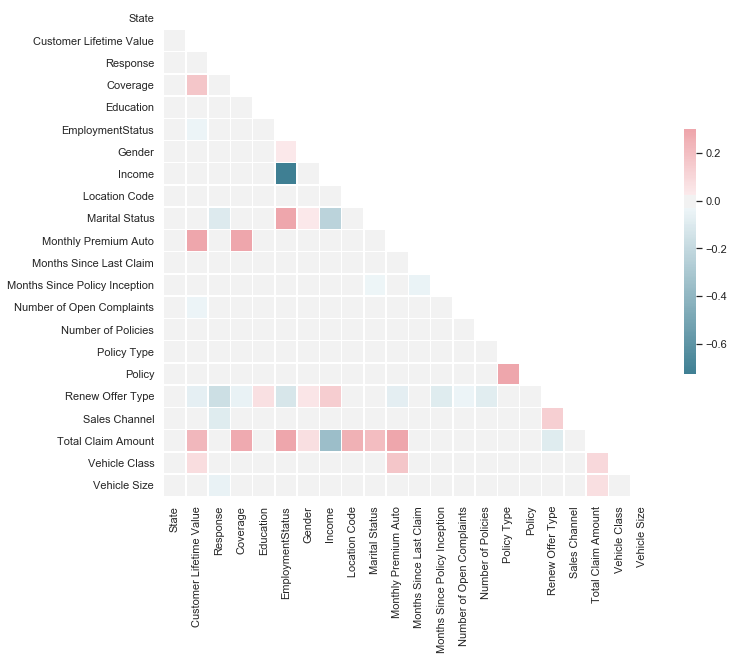

In [15]:
from string import ascii_letters

sns.set(style="white")



# Compute the correlation matrix
corr = df_n.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
from sklearn.model_selection import train_test_split
X = df_n
Y = df_n['Response']
X = X.drop('Response', 1)

In [17]:
X

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1.00,0.010629,0.0,0.00,0.25,0.0,0.562847,0.5,0.5,0.033755,...,0.050505,0.0,0.000,0.0,0.250,0.000000,0.000000,0.132974,1.0,0.5
1,0.00,0.062406,0.5,0.00,1.00,0.0,0.000000,0.5,1.0,0.139241,...,0.424242,0.0,0.875,0.5,0.625,0.666667,0.000000,0.391051,0.0,0.5
2,0.50,0.134960,1.0,0.00,0.25,0.0,0.487763,0.5,0.5,0.198312,...,0.383838,0.0,0.125,0.5,0.625,0.000000,0.000000,0.195764,1.0,0.5
3,0.25,0.070589,0.0,0.00,1.00,1.0,0.000000,0.5,0.5,0.189873,...,0.656566,0.0,0.750,0.0,0.125,0.000000,0.666667,0.183117,0.6,0.5
4,1.00,0.011245,0.0,0.00,0.25,1.0,0.438443,0.0,1.0,0.050633,...,0.444444,0.0,0.000,0.5,0.375,0.000000,0.000000,0.047710,0.0,0.5
5,0.75,0.078085,0.0,0.00,0.25,0.0,0.629140,0.0,0.5,0.033755,...,0.949495,0.0,0.125,0.5,0.625,0.333333,1.000000,0.055056,1.0,0.5
6,0.75,0.042773,0.0,0.25,0.25,0.0,0.553605,0.5,0.5,0.025316,...,0.131313,0.0,1.000,0.0,0.250,0.000000,0.000000,0.111125,0.0,0.5
7,0.00,0.065311,1.0,1.00,1.00,1.0,0.000000,1.0,1.0,0.168776,...,0.686869,0.0,0.375,0.0,0.250,0.000000,0.000000,0.125445,0.0,0.5
8,0.75,0.272998,0.0,0.00,0.50,1.0,0.140747,0.5,0.0,0.042194,...,0.030303,0.0,0.125,0.0,0.250,0.000000,0.000000,0.176660,0.0,0.5
9,0.75,0.067424,0.5,0.25,0.25,0.0,0.288175,1.0,0.5,0.135021,...,0.070707,0.0,0.875,1.0,0.875,0.333333,0.333333,0.147047,0.0,0.5


In [18]:
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       1.0
6       1.0
7       0.0
8       1.0
9       0.0
10      0.0
11      0.0
12      0.0
13      1.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      1.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
9104    0.0
9105    0.0
9106    0.0
9107    1.0
9108    0.0
9109    0.0
9110    1.0
9111    0.0
9112    0.0
9113    0.0
9114    0.0
9115    0.0
9116    0.0
9117    0.0
9118    0.0
9119    1.0
9120    0.0
9121    0.0
9122    1.0
9123    1.0
9124    0.0
9125    0.0
9126    0.0
9127    0.0
9128    0.0
9129    0.0
9130    1.0
9131    0.0
9132    0.0
9133    0.0
Name: Response, Length: 9134, dtype: float64

In [19]:
x_train,x_test, y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [20]:
x_train.head(100)

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
5123,1.00,0.035258,0.0,0.00,0.25,1.0,0.511537,1.0,0.5,0.000000,...,0.323232,0.2,1.000,0.5,0.625,0.000000,0.000000,0.077150,1.0,0.5
7738,0.75,0.011416,0.5,0.25,1.00,0.0,0.000000,0.5,1.0,0.075949,...,0.252525,0.0,0.000,1.0,0.875,0.666667,0.333333,0.196569,0.0,0.5
214,0.00,0.012464,0.0,0.25,0.25,1.0,0.811124,0.5,0.0,0.054852,...,0.676768,0.0,0.000,0.5,0.375,1.000000,0.000000,0.122739,0.0,1.0
8580,0.25,0.039793,0.0,0.00,0.25,0.0,0.722777,1.0,0.5,0.012658,...,0.666667,0.0,1.000,0.0,0.250,0.666667,1.000000,0.094206,0.0,0.5
7857,1.00,0.008748,0.0,0.00,0.25,0.0,0.547474,0.5,1.0,0.021097,...,0.868687,0.0,0.000,0.5,0.625,0.666667,1.000000,0.135448,0.0,0.5
2304,0.25,0.088456,0.0,0.25,0.25,0.0,0.389054,0.5,0.0,0.236287,...,0.686869,0.0,0.250,0.0,0.125,0.000000,0.000000,0.194080,0.6,1.0
862,0.25,0.118728,0.5,0.25,0.25,0.0,0.646543,1.0,0.5,0.147679,...,0.797980,0.0,0.125,0.5,0.500,0.666667,0.333333,0.139698,0.0,0.0
3,0.25,0.070589,0.0,0.00,1.00,1.0,0.000000,0.5,0.5,0.189873,...,0.656566,0.0,0.750,0.0,0.125,0.000000,0.666667,0.183117,0.6,0.5
6822,0.75,0.041208,1.0,0.25,0.50,1.0,0.128134,0.5,0.5,0.375527,...,0.000000,0.4,0.000,0.0,0.125,0.333333,0.666667,0.248830,0.6,0.5
3257,0.00,0.042709,0.5,0.75,1.00,1.0,0.000000,0.5,1.0,0.080169,...,0.575758,0.2,0.375,0.5,0.500,0.666667,0.333333,0.258901,0.0,0.5


In [21]:




from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
trainedsvm = svm.SVC(kernel='sigmoid').fit(x_train, y_train)
predictionsvm = trainedsvm.predict(x_test)
print(confusion_matrix(y_test,predictionsvm))
print(classification_report(y_test,predictionsvm))

C:\Users\soura\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1561    0]
 [ 266    0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1561
         1.0       0.00      0.00      0.00       266

    accuracy                           0.85      1827
   macro avg       0.43      0.50      0.46      1827
weighted avg       0.73      0.85      0.79      1827



C:\Users\soura\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
y_train.head(100)

5123    0.0
7738    0.0
214     0.0
8580    0.0
7857    0.0
2304    0.0
862     0.0
3       0.0
6822    0.0
3257    0.0
3299    0.0
4929    0.0
181     0.0
1618    0.0
8459    1.0
7709    0.0
6232    1.0
8029    1.0
3151    0.0
4550    0.0
8726    0.0
2861    0.0
8973    0.0
6592    1.0
3573    0.0
8106    1.0
8736    0.0
6427    0.0
70      0.0
544     0.0
       ... 
6876    0.0
2577    0.0
4475    0.0
2759    0.0
3463    0.0
9092    0.0
218     1.0
5356    0.0
6749    0.0
3316    0.0
3205    0.0
1919    1.0
1244    0.0
5689    0.0
6426    0.0
7180    1.0
5344    0.0
1643    0.0
7735    0.0
7692    0.0
576     0.0
5551    0.0
8323    0.0
2288    0.0
1775    1.0
1166    0.0
4132    0.0
2847    0.0
415     0.0
4204    0.0
Name: Response, Length: 100, dtype: float64

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(solver='liblinear')
lr_scores = cross_val_score(lr,
                            x_train,
                            y_train,
                            cv=5,
                            scoring='roc_auc')

In [24]:

print('LR scores =',lr_scores)

LR scores = [0.66776387 0.67865066 0.69153263 0.66244091 0.66340015]


In [25]:
from sklearn.feature_selection import VarianceThreshold

sel = feature_selection.VarianceThreshold()
train_variance = sel.fit_transform(df_n)
train_variance.shape

NameError: name 'feature_selection' is not defined

In [26]:
corr_matrix = df_n.corr().abs()
for col in df_n.columns:
    print(corr_matrix[col].sort_values(ascending=False).head(10))

State                            1.000000
Marital Status                   0.020371
Education                        0.015755
Policy                           0.014241
Months Since Policy Inception    0.013965
Number of Policies               0.013866
Vehicle Class                    0.011407
Customer Lifetime Value          0.008778
Policy Type                      0.008638
Monthly Premium Auto             0.007898
Name: State, dtype: float64
Customer Lifetime Value      1.000000
Monthly Premium Auto         0.396262
Total Claim Amount           0.226451
Coverage                     0.168040
Vehicle Class                0.082307
Renew Offer Type             0.068548
Number of Open Complaints    0.036343
EmploymentStatus             0.034846
Education                    0.026038
Marital Status               0.026003
Name: Customer Lifetime Value, dtype: float64
Response                   1.000000
Renew Offer Type           0.162882
Marital Status             0.094843
Sales Channel     

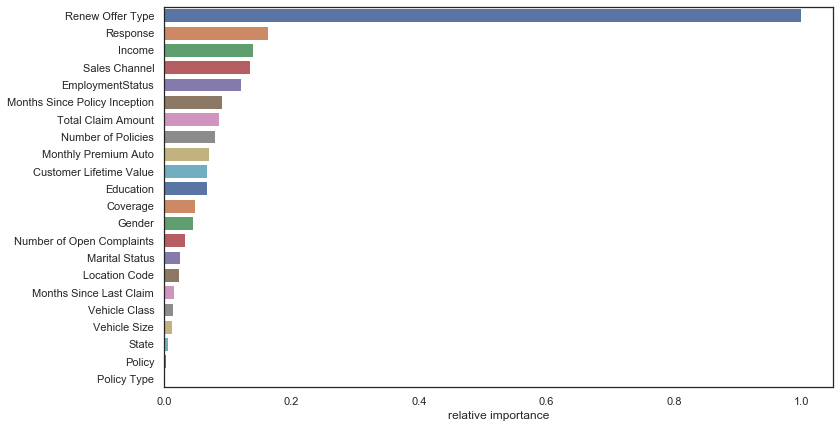

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
ser_rank = corr_matrix['Renew Offer Type'].sort_values(ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()

In [28]:
print(df_n.head())
for i in df_n.columns:
    print(df_n[i].describe())

   State  Customer Lifetime Value  Response  Coverage  Education  \
0   1.00                 0.010629       0.0       0.0        0.0   
1   0.00                 0.062406       0.0       0.5        0.0   
2   0.50                 0.134960       0.0       1.0        0.0   
3   0.25                 0.070589       0.0       0.0        0.0   
4   1.00                 0.011245       0.0       0.0        0.0   

   EmploymentStatus  Gender    Income  Location Code  Marital Status  ...  \
0              0.25     0.0  0.562847            0.5             0.5  ...   
1              1.00     0.0  0.000000            0.5             1.0  ...   
2              0.25     0.0  0.487763            0.5             0.5  ...   
3              1.00     1.0  0.000000            0.5             0.5  ...   
4              0.25     1.0  0.438443            0.0             1.0  ...   

   Months Since Policy Inception  Number of Open Complaints  \
0                       0.050505                        0.0   
1 

In [29]:
df_n['Income'].describe()

count    9134.000000
mean        0.376645
std         0.303857
min         0.000000
25%         0.000000
50%         0.338959
75%         0.623318
max         1.000000
Name: Income, dtype: float64

In [30]:
 0.303857**2

0.09232907644899999

In [31]:
df_n['Renew Offer Type'].describe()

count    9134.000000
mean        0.323407
std         0.335859
min         0.000000
25%         0.000000
50%         0.333333
75%         0.666667
max         1.000000
Name: Renew Offer Type, dtype: float64

In [32]:
0.335859**2

0.112801267881

In [33]:
df_n['Gender'].describe()

count    9134.000000
mean        0.490037
std         0.499928
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64

In [34]:
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] <1 and corr_matrix[column]>0.5)]
print('Columns to drop:', len(to_drop))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [35]:
corr_matrix.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [36]:
for col in corr_matrix.columns:
    print(corr_matrix[col])


State                            1.000000
Customer Lifetime Value          0.008778
Response                         0.002473
Coverage                         0.002047
Education                        0.015755
EmploymentStatus                 0.000368
Gender                           0.004933
Income                           0.004620
Location Code                    0.005240
Marital Status                   0.020371
Monthly Premium Auto             0.007898
Months Since Last Claim          0.002126
Months Since Policy Inception    0.013965
Number of Open Complaints        0.000021
Number of Policies               0.013866
Policy Type                      0.008638
Policy                           0.014241
Renew Offer Type                 0.007194
Sales Channel                    0.003080
Total Claim Amount               0.005495
Vehicle Class                    0.011407
Vehicle Size                     0.006846
Name: State, dtype: float64
State                            0.008778
Custom

In [37]:
lista = []
listb = []
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if corr_matrix[col1][col2] > 0.3:
            listb.append(col2)
    lista.append(listb)

print(lista)

[['State', 'Customer Lifetime Value', 'Monthly Premium Auto', 'Response', 'Coverage', 'Monthly Premium Auto', 'Education', 'EmploymentStatus', 'Income', 'Marital Status', 'Total Claim Amount', 'Gender', 'EmploymentStatus', 'Income', 'Total Claim Amount', 'Location Code', 'EmploymentStatus', 'Marital Status', 'Customer Lifetime Value', 'Coverage', 'Monthly Premium Auto', 'Total Claim Amount', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'EmploymentStatus', 'Income', 'Monthly Premium Auto', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'], ['State', 'Customer Lifetime Value', 'Monthly Premium Auto', 'Response', 'Coverage', 'Monthly Premium Auto', 'Education', 'EmploymentStatus', 'Income', 'Marital Status', 'Total Claim Amount', 'Gender', 'EmploymentStatus', 'Income', 'Total Claim Amount', 'Location Code', 'EmploymentStatus', 'Marit

In [38]:
df.head()


,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


In [39]:
df_n = df_n.drop(['Monthly Premium Auto','EmploymentStatus','Total Claim Amount','Policy'], axis=1)

In [40]:
df_n.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Gender,Income,Location Code,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,1.00,0.010629,0.0,0.0,0.0,0.0,0.562847,0.5,0.5,0.914286,0.050505,0.0,0.000,0.0,0.000000,0.000000,1.0,0.5
1,0.00,0.062406,0.0,0.5,0.0,0.0,0.000000,0.5,1.0,0.371429,0.424242,0.0,0.875,0.5,0.666667,0.000000,0.0,0.5
2,0.50,0.134960,0.0,1.0,0.0,0.0,0.487763,0.5,0.5,0.514286,0.383838,0.0,0.125,0.5,0.000000,0.000000,1.0,0.5
3,0.25,0.070589,0.0,0.0,0.0,1.0,0.000000,0.5,0.5,0.514286,0.656566,0.0,0.750,0.0,0.000000,0.666667,0.6,0.5
4,1.00,0.011245,0.0,0.0,0.0,1.0,0.438443,0.0,1.0,0.342857,0.444444,0.0,0.000,0.5,0.000000,0.000000,0.0,0.5


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv('./DATA.csv')

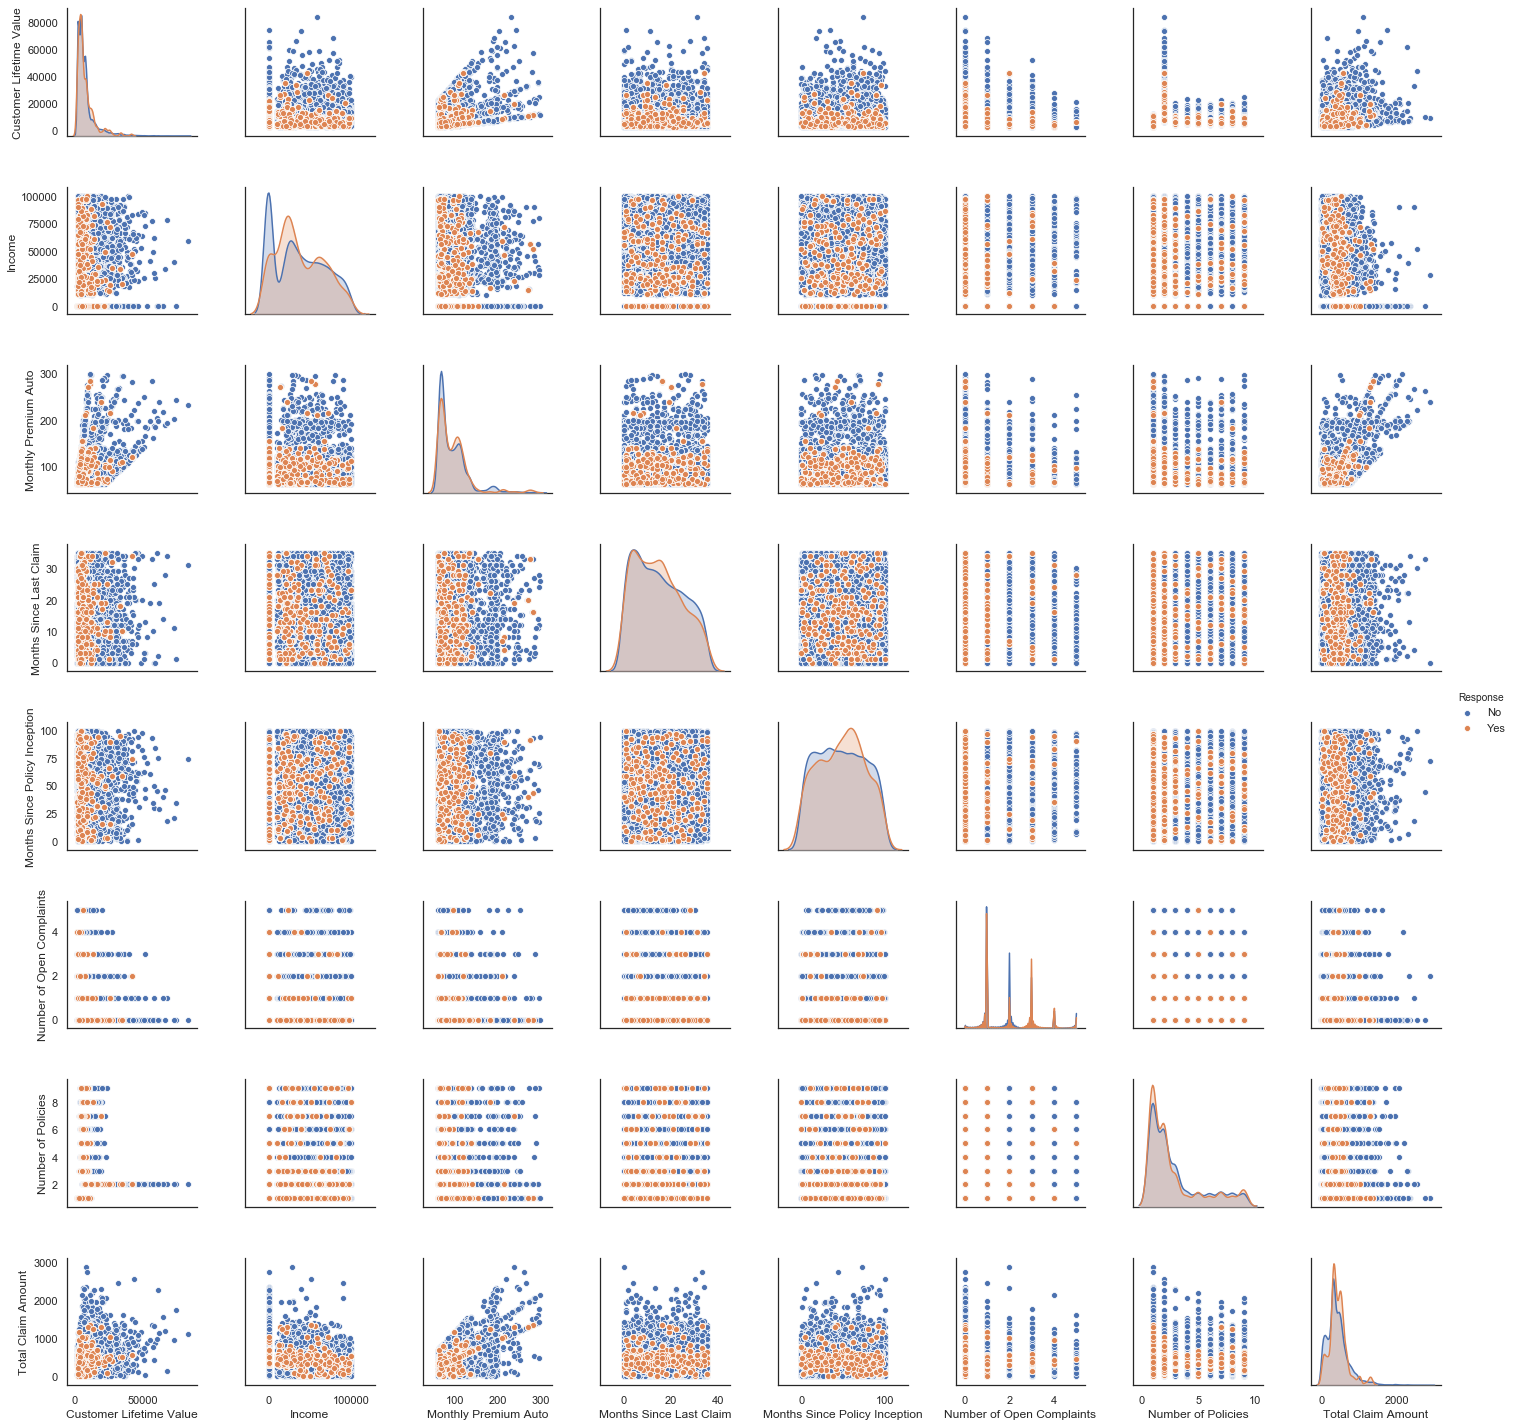

In [42]:
sns.pairplot(dataset, hue="Response")

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
XX = df_n
YY = df_n['Response']
XX = XX.drop('Response', 1)
sc = StandardScaler()
XXX = sc.fit_transform(XX)
XXX

array([[ 1.75371962, -0.76287773, -0.73289946, ..., -1.03113846,
         1.49918077, -0.16668206],
       [-1.35259249, -0.14924546,  0.79199887, ..., -1.03113846,
        -0.91292371, -0.16668206],
       [ 0.20056356,  0.71063622,  2.31689721, ..., -1.03113846,
         1.49918077, -0.16668206],
       ...,
       [-0.57601447,  0.02313483,  0.79199887, ..., -0.09602938,
        -0.91292371, -0.16668206],
       [-0.57601447, -0.06993547,  0.79199887, ..., -0.09602938,
        -0.91292371, -2.0278971 ],
       [-0.57601447, -0.78495478,  0.79199887, ...,  0.83907971,
         1.49918077, -0.16668206]])

In [44]:
from sklearn.model_selection import train_test_split
X_t, X_te, y_t, y_te = train_test_split(XXX,YY , test_size=0.2)

In [45]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [46]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [68]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=17))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [69]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [70]:
classifier.fit(X_t,y_t, batch_size=100, epochs=100)


Epoch 1/100
7307/7307 [==============================] - 0s 55us/step - loss: 0.6674 - accuracy: 0.8545
Epoch 2/100
7307/7307 [==============================] - 0s 17us/step - loss: 0.5654 - accuracy: 0.8545
Epoch 3/100
7307/7307 [==============================] - 0s 16us/step - loss: 0.4419 - accuracy: 0.8545
Epoch 4/100
7307/7307 [==============================] - 0s 20us/step - loss: 0.3951 - accuracy: 0.8545
Epoch 5/100
7307/7307 [==============================] - 0s 14us/step - loss: 0.3857 - accuracy: 0.8545
Epoch 6/100
7307/7307 [==============================] - 0s 15us/step - loss: 0.3813 - accuracy: 0.8545
Epoch 7/100
7307/7307 [==============================] - 0s 26us/step - loss: 0.3781 - accuracy: 0.8545
Epoch 8/100
7307/7307 [==============================] - 0s 27us/step - loss: 0.3756 - accuracy: 0.8545
Epoch 9/100
7307/7307 [==============================] - 0s 14us/step - loss: 0.3732 - accuracy: 0.8545
Epoch 10/100
7307/7307 [==============================] - 0s 17

In [71]:
eval_model=classifier.evaluate(X_t, y_t)
eval_model

7307/7307 [==============================] - 0s 18us/step


[0.3255718122824641, 0.8524702191352844]

In [72]:
y_pred=classifier.predict(X_te)
y_pred =(y_pred>0.5)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te, y_pred)
print(cm)

[[1525   57]
 [ 213   32]]


In [10]:
dfn = pd.read_csv('/Users/minalchandra/Downloads/WaA_Fn-UseC_-HR-Employee-Attrition 2.csv')

FileNotFoundError: [Errno 2] File b'/Users/minalchandra/Downloads/WaA_Fn-UseC_-HR-Employee-Attrition 2.csv' does not exist: b'/Users/minalchandra/Downloads/WaA_Fn-UseC_-HR-Employee-Attrition 2.csv'

In [14]:
dfn=pd.read_csv('/Users/minalchandra/Downloads/WA_Fn-UseC_-Marketing-Customer-Value-Analysis 2.csv')

In [34]:
categorical_df = dfn.select_dtypes(include='object')
categorical_df = categorical_df.drop("Response", 1)
cat_df = categorical_df.drop(['Customer','Effective To Date'], axis = 1)
cat_df.nunique()

State               5
Coverage            3
Education           5
EmploymentStatus    5
Gender              2
Location Code       3
Marital Status      3
Policy Type         3
Policy              9
Renew Offer Type    4
Sales Channel       4
Vehicle Class       6
Vehicle Size        3
dtype: int64

In [35]:
dfn2 = pd.get_dummies(dfn, columns = cat_df.columns, drop_first=True)
dfn2.head()
dfn2.shape

(9134, 53)

In [36]:
dfn2.head()

,Customer,Customer Lifetime Value,Response,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,2763.519279,No,2/24/11,56274,69,32,5,0,1,...,0,0,0,0,0,0,0,1,1,0
1,QZ44356,6979.535903,No,1/31/11,0,94,13,42,0,8,...,0,0,0,0,0,0,0,0,1,0
2,AI49188,12887.431650,No,2/19/11,48767,108,18,38,0,2,...,0,0,0,0,0,0,0,1,1,0
3,WW63253,7645.861827,No,1/20/11,0,106,18,65,0,7,...,0,1,0,0,0,1,0,0,1,0
4,HB64268,2813.692575,No,2/3/11,43836,73,12,44,0,1,...,0,0,0,0,0,0,0,0,1,0


In [37]:
dfn2 = dfn2.drop(["Customer","Effective To Date"], axis = 1)

In [38]:
dfn2["Response"]

0        No
1        No
2        No
3        No
4        No
       ... 
9129     No
9130    Yes
9131     No
9132     No
9133     No
Name: Response, Length: 9134, dtype: object

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

y = dfn2['Response']
x = dfn2.drop('Response', axis = 1)
x_tr, x_tes, y_tr, y_tes = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
dfn.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [33]:
dfn2.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State_California', 'State_Nevada', 'State_Oregon', 'State_Washington',
       'Response_Yes', 'Coverage_Extended', 'Coverage_Premium',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_M',
       'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Married', 'Marital Status_Single',
       'Policy Type_Personal Auto', 'Policy Type_Special Auto',
       'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1',
       'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1',
       'Policy_Special L2', 'Policy_Special L3', 'Renew Offe

In [40]:
scaler = preprocessing.StandardScaler().fit(x_tr)
x_train_s = scaler.transform(x_tr)
x_test_s = scaler.transform(x_tes)

In [42]:
x_train_s

array([[ 0.86624454, -1.23743619,  0.25280178, ..., -0.51611803,
        -1.54112223, -0.48812365],
       [ 0.01155707, -0.1843032 , -0.66770282, ..., -0.51611803,
        -1.54112223,  2.04866122],
       [-0.73541277, -1.23743619, -0.43757667, ..., -0.51611803,
         0.6488778 , -0.48812365],
       ...,
       [ 0.00886377, -0.23120266, -0.69646859, ..., -0.51611803,
         0.6488778 , -0.48812365],
       [ 0.69705975, -0.32385047,  0.45416216, ..., -0.51611803,
        -1.54112223, -0.48812365],
       [-0.05580937,  0.74194472,  3.04308135, ..., -0.51611803,
         0.6488778 , -0.48812365]])

In [43]:
pca = PCA(n_components = 0.99)
pca.fit(x_train_s)
print('Variance ratio of each pc:\n', pca.explained_variance_ratio_, '\n')
print('Explained variance of each pc:\n', pca.explained_variance_, '\n')
print('Selected {} pcs'.format(pca.n_components_))
print('Original dataset shape: ', dfn2.shape)

Variance ratio of each pc:
 [0.07706016 0.05091233 0.04893001 0.03711995 0.03462162 0.03040128
 0.02939755 0.02892997 0.02770381 0.02657542 0.02607974 0.02531376
 0.02491677 0.02458747 0.0241114  0.02374986 0.02362361 0.02268277
 0.02224357 0.02221552 0.0215337  0.02106417 0.0209367  0.02081325
 0.0206268  0.0205275  0.01998151 0.01984401 0.01979831 0.01932994
 0.01895383 0.01876543 0.01801059 0.01688109 0.01533275 0.01361656
 0.0105709  0.00991854 0.00849169 0.00746581 0.00538126 0.00502709
 0.00489206 0.00452475] 

Explained variance of each pc:
 [3.85353537 2.545965   2.44683556 1.85625144 1.73131816 1.52027186
 1.47007869 1.44669658 1.38538005 1.32895293 1.30416554 1.26586113
 1.24600906 1.22954173 1.20573478 1.18765567 1.18134199 1.13429349
 1.11233067 1.11092802 1.07683234 1.05335263 1.04697853 1.04080481
 1.03148133 1.02651538 0.99921237 0.99233606 0.99005104 0.96662943
 0.94782115 0.93840001 0.90065288 0.84417003 0.76674264 0.680921
 0.52861721 0.49599508 0.4246424  0.37334158 

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# build a pipeline which executes three steps in a row
pipe = Pipeline([
    ('standardization', preprocessing.StandardScaler()),
    ('pca', PCA()),    
    ('lg', LogisticRegression(C=0.01, solver = 'lbfgs', max_iter = 1000))
])

# set the range of parameters to be tuned
param_grid = {'pca__n_components':  range(2, 11)}
# grid search using cross validation
grid = GridSearchCV(pipe, cv = 3, param_grid = param_grid, scoring = 'roc_auc', refit=True)
grid_fit = grid.fit(x_tr, y_tr)

In [45]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
report(grid.cv_results_)

Model with rank: 1
Mean validation score: 0.681 (std: 0.024)
Parameters: {'pca__n_components': 10}

Model with rank: 2
Mean validation score: 0.632 (std: 0.022)
Parameters: {'pca__n_components': 9}

Model with rank: 3
Mean validation score: 0.621 (std: 0.029)
Parameters: {'pca__n_components': 8}



In [46]:
from sklearn import linear_model, decomposition, datasets
param_grid =   [5,6,7,8,9,10]
C=[1000, 100, 10, 1, 0.1, 0.01]
logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
X_digits=x_tr
y_digits=y_tr
grid = GridSearchCV(pipe,
                         dict(pca__n_components=param_grid,
                              logistic__C=C))
grid.fit(X_digits, y_digits)



/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-

/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/minalchandra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
               

In [49]:
def report2(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        #print(candidates)
        for candidate in candidates:
           # print(candidate)
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            #print(pipe['lg'])
            print("")
#print(grid.best_estimator_)
print("Best Parameters : PCA {0} , logistic {1}".format(grid.best_estimator_.named_steps['pca'].n_components,grid.best_estimator_.named_steps['logistic'].C))
#print(grid.cv_results_)
#report2(grid.cv_results_)



Best Parameters : PCA 5 , logistic 1000
